A fairly standard pattern for importing `NumPy`, along with some other `import` statements we will need later.  

It's helpful to have all the `import`s in a single cell at the top of the notebook, in order to be able to re-import everything if restarting the notebook.

In [1]:
import numpy as np

import requests
from PIL import Image

import math
import sys

Create a 1 dimensional array containing the numbers 0 through 5 and print out its its **shape** and its **data type**.

In [2]:
arr = np.array(range(6))
print(arr.shape)
print(arr.dtype)

(6,)
int64


The fact that there's nothing after the comma indicates this is a 1 dimensional array.  Print it out now.

In [3]:
print(arr)


[0 1 2 3 4 5]


Some computers have instructions specially designed to operate on multiple data items at once - these are called SIMD (Single Instruction Multiple Data) instructions.

Now create a 2D array containing the numbers 1 through 12 from list literals.

In [4]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(arr.shape)
print(arr)

(3, 4)
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Get a subset of the rows using _slicing_.  The first way is **explicit** that all columns should be included, while in the 2nd case it's **implicit**.

In [5]:
print(arr, "\n")

print(arr[0:2, :], "\n")

print(arr[0:2], "\n")

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

[[1 2 3 4]
 [5 6 7 8]] 

[[1 2 3 4]
 [5 6 7 8]] 



Now get a subset of both the rows and columns

In [6]:
print(arr, "\n")
print(arr[1:3,0:2], "\n")
print(arr[1:3,0:2].shape, "\n")

(rows, columns) = arr[1:3,0:2].shape
print(rows, columns)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

[[ 5  6]
 [ 9 10]] 

(2, 2) 

2 2


Generate another array using the combination of `arange` and `reshape`.

In [7]:
arr = np.arange(1,13).reshape(4, 3)
print(arr)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


And get a subset of the rows in the array.  This time the row selector is a `list`, so we can pull out just the **first** and **last** rows of `arr`, ignoring the middle one.

In [8]:
print(arr, "\n")
print(arr[[0,2]],"\n")

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

[[1 2 3]
 [7 8 9]] 



Here's another way to do it, using a negative index to get the last row.

In [9]:
print(arr, "\n")
print(arr[[0, -1]], "\n")

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

[[ 1  2  3]
 [10 11 12]] 



And of course we can do the same for the columns

In [10]:
print(arr, "\n")
print(arr[[0,2]][:, [0,2]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

[[1 3]
 [7 9]]


I'm not 100% sure why the line below is doing what it's doing - maybe you can figure it out!

In [11]:
arr[[0,2],[0,2]]

array([1, 9])

#  Part 2 - working with images

An **image** is just a `w` x `h` x `3` series of numbers, where each triplet of numbers represents an intensity of the base colors <span style="color:rgb(255,0,0)">red</span>, <span style="color:rgb(0,255,0)">green</span>, and <span style="color:rgb(0,0,255)">blue</span>.  First, let's create a simple image made up completely of pixels using <span style="color:rgb(244,106,31)">Hope College Orange, RGB (244,106,31)</span>

In [12]:
hope_orange = (244, 106, 31)
hope_blue = (0, 34, 68)

In [13]:
image_width = 64
image_height = 32

image_as_array = np.empty((image_height, image_width, 3), dtype=np.uint8)
red = np.full((image_height, image_width), hope_orange[0], dtype=np.uint8)
green = np.full((image_height, image_width), hope_orange[1], dtype=np.uint8)
blue = np.full((image_height, image_width), hope_orange[2], dtype=np.uint8)

image_as_array[:, :, 0] = red
image_as_array[:, :, 1] = green
image_as_array[:, :, 2] = blue

As a quick check, look at the value of the pixel at (0, 0).

In [14]:
image_as_array[0, 0]

array([244, 106,  31], dtype=uint8)

Now construct a `PIL` `Image` from that data, and display it.

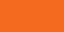

In [15]:
image = Image.fromarray(image_as_array)
display(image)

Now let's draw a `hope_blue` line through the middle of the image

In [16]:
one_row_red = np.full((1, image_width), hope_blue[0], dtype=np.uint8)
one_row_green = np.full((1, image_width), hope_blue[1], dtype=np.uint8)
one_row_blue = np.full((1, image_width), hope_blue[2], dtype=np.uint8)

image_as_array[image_height // 2 ,:, 0] = one_row_red
image_as_array[image_height // 2 ,:, 1] = one_row_green
image_as_array[image_height // 2 ,:, 2] = one_row_blue


And print out the first pixel in the 5 middle rows of the image

In [17]:
print(image_as_array[ (image_height//2-2):image_height//2+3, 0, :])

[[244 106  31]
 [244 106  31]
 [  0  34  68]
 [244 106  31]
 [244 106  31]]


What does this image look like?

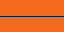

In [18]:
display(Image.fromarray(image_as_array))

# Working with the anchor logo 

Let's load in the Hope anchor logo and create a tiled version of it.

First, use the `requests` library to download an image from the web.  We will explore the `Response` object in first to explore how the `requests` library works.

In [19]:
url = "https://hope.edu/offices/public-affairs-marketing/images/anchor-transparent.png"

In [20]:
response = requests.get(url, stream=True)
print(response.status_code)
print(response.ok)
print(response.headers['Content-type'], response.headers['Content-length'])

200
True
image/png 37387


Now we can create an `Image` object from the `Response` object's content.  We'll download the image again even though it's not really necessary to do so; we could use the `response` object from above.

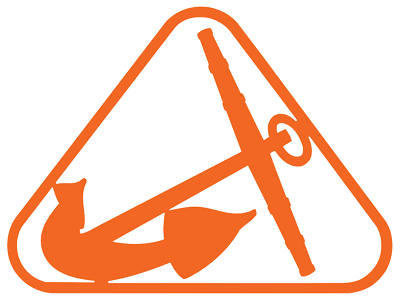

In [21]:
anchor = Image.open(requests.get(url, stream=True).raw)
display(anchor)

Now let's get the image as a `numpy` array and look at its shape.

In [22]:
anchor_as_array = np.array(anchor)
print(anchor_as_array.shape)

(298, 400, 4)


##  Counting the number of pixels that are the `hope_orange` color.

We can use **boolean indexing** to find the pixels that are equal to our `hope_orange` color.

First try it using a comparison to the whole color tuple.

In [23]:
print(anchor_as_array == hope_orange)

False


/tmp/ipykernel_357/1448355800.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(anchor_as_array == hope_orange)


This doesn't work, because NumPy will only compare two arrays that have the same size using the `==` operator.

Let's try it by doing the 3 color components separately.

In [24]:
red_matches = anchor_as_array[:, :, 0] == hope_orange[0]
print(red_matches.shape)
print(red_matches.dtype)
print(np.sum(red_matches))

(298, 400)
bool
319


In [25]:
green_matches = anchor_as_array[:, :, 1] == hope_orange[1]
print(np.sum(green_matches))

blue_matches = anchor_as_array[:, :, 2] == hope_orange[2]
print(np.sum(blue_matches))

54
3


Now we can combine the boolean arrays using the `and` operators using the `np.logical_and` function.

In [26]:
both_red_and_green_match = np.logical_and(red_matches, blue_matches)
all_match = np.logical_and(both_red_and_green_match, blue_matches)

Now we can compute the sum of the values in `all_match`.

In [27]:
print(np.sum(all_match))

0


Here's a way we could do it using `==`

In [29]:
all_orange = np.zeros((298, 400, 3), dtype=np.uint8)
hope_orange_with_alpha = [*hope_orange, 0]
all_orange[:] = hope_orange
print(all_orange.shape)

print(anchor_as_array.shape)
matches = anchor_as_array[:, :, 0:3] == all_orange
print(matches[0,0:5])
print(matches.shape)

matches_after_all = np.all(matches, axis=2)
print(matches_after_all.shape)
print(np.sum(matches_after_all))

anchor_as_array[:, :, :] == all_orange

(298, 400, 3)
(298, 400, 4)
[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]]
(298, 400, 3)
(298, 400)
0


/tmp/ipykernel_357/1640451677.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  anchor_as_array[:, :, :] == all_orange


False

##  A brief look at using the `axis` argument with `np.sum`

Let's revisit finding the number of pixels that match the red value of our `hopeorange` color.

Now we can compute the number of elements in each **row** of pixels that match the red component of `hopeorange`.

##  Tiling the image

Now let's create a version of the image that looks like this:

<img src="tiled_anchor.png">


First, make an empty image big enough to hold some copies of the anchor

In [0]:
rows = 3
columns = 4
(width, height) = anchor.size

Copy the anchor data into the appropriate locations.  While `numpy` is optimized for avoiding loops, I'm not sure this can be done without a loop.

That's pretty big, let's make it a little smaller.

#  Creating a grayscale version of an image

Use the `requests` library to download the file, create an `Image` object from the `Response` object's content, and then create a `NumPy` array from the `Image`.

In [0]:
url = "https://hope.edu/graphics/prportraits/RyanMcFall.jpg"
mcfall = np.array(Image.open(requests.get(url, stream=True).raw))
print(mcfall.shape)
print(mcfall.dtype)

Since these are 8 bit integers, and we will be multiplying them together to calculate the distance, we will need to convert the arrays into a type large enough to hold the result, which will be a `uint16`

Now it will be OK for us to multiply `mcfall_16` by itself, sum up the values, and then take the square root of them

And a quick check manually

Get the square root of `sum_squared`, and do a quick check on that as well.

Now we can:
* create an empty array that's the same size as `mcfall`
* compute a value between 0 and 1 for the distance from 0
* set the (R, G, B) values to be that normalized value multiplied by the maximum possible pixel brightness of 255

Some sanity checks:

In [0]:
print(np.max(sum_squared))
print(np.max(grayscale))
print(np.max(np.sum(mcfall, axis=2)))
print(np.min(np.sum(mcfall, axis=2)))

In [0]:
grayscale_image = Image.fromarray(grayscale.astype(np.uint8))